In [534]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split#
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [535]:
df=pd.read_csv('mushroom2.csv')

In [536]:
df.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,1,convex,smooth,yellow,yes,almond,free,close,broad,black,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,2,bell,smooth,white,yes,anise,free,close,broad,brown,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,3,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,4,convex,smooth,gray,no,none,free,crowded,broad,black,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible


In [550]:
# create an instance of Label Encoder, One Hot Encode, Standard Scaler
le = LabelEncoder()
one_hot = OneHotEncoder()
ss = StandardScaler()

In [552]:
# split data into independent features and target variable
X = df.drop(['class'], axis=1)
y = df['class']


In [554]:
for i in X.columns:
    X[i] = le.fit_transform(X[i])

In [555]:
y = le.fit_transform(y)


In [556]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,1,7,1,0,1,0,0,...,3,3,7,7,2,1,4,0,3,4
1,2,3,9,1,0,1,0,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,3,8,1,1,1,0,0,1,0,...,3,3,7,7,2,1,4,1,2,2
3,2,2,8,1,7,1,0,1,1,0,...,3,3,7,7,2,1,4,0,3,4
4,2,3,3,0,6,1,1,0,0,1,...,3,3,7,7,2,1,0,1,0,0


In [557]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [558]:
fs = SelectKBest(score_func=chi2, k ='all')

In [559]:
# fitting data
fs.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x000002BEBE355DA0>)

Feature 0: 105.377849
Feature 1: 226.305540
Feature 2: 76.156142
Feature 3: 1194.277352
Feature 4: 50.293912
Feature 5: 3.505447
Feature 6: 826.795274
Feature 7: 1636.606833
Feature 8: 1401.345160
Feature 9: 36.594105
Feature 10: 1358.358638
Feature 11: 99.829173
Feature 12: 49.206144
Feature 13: 477.500664
Feature 14: 436.232423
Feature 15: 5.126826
Feature 16: 25.646335
Feature 17: 1950.610146
Feature 18: 5713.529406
Feature 19: 311.766736
Feature 20: 8.077202


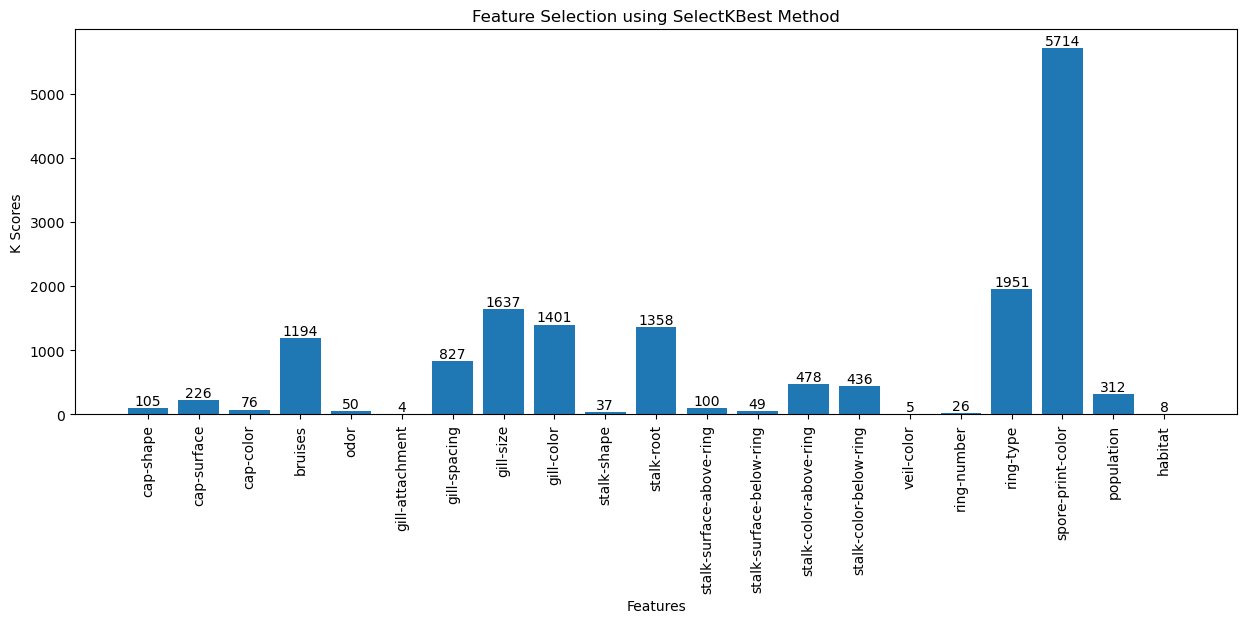

In [560]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1,1),(0,0))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_.round(0))
plt.xlabel('Features')
plt.ylabel('K Scores')
plt.xticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'], rotation=90)
for i in ax1.containers:
    ax1.bar_label(i)
plt.title('Feature Selection using SelectKBest Method')
plt.show()



In [562]:
new_data = df[['class','bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'ring-type', 'spore-print-color']]
print(new_data.shape)
new_data.head()

(8124, 8)


,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,ring-type,spore-print-color
0,poisonous,yes,close,narrow,black,equal,pendant,black
1,edible,yes,close,broad,black,club,pendant,brown
2,edible,yes,close,broad,brown,club,pendant,brown
3,poisonous,yes,close,narrow,brown,equal,pendant,black
4,edible,no,crowded,broad,black,equal,evanescent,brown


In [563]:

new_data.to_csv("final_data.csv", index=False, header=True)

In [564]:
# split data into independent features and target variable
X = new_data.drop(['class'], axis=1)
y = new_data['class']

In [565]:
# categorical features
cat_features = X.select_dtypes(include="object").columns


In [566]:
cat_features

Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'ring-type', 'spore-print-color'],
      dtype='object')

In [568]:
# create pipelines for categorical data
cat_pipeline = Pipeline(
    steps=[
        ("one hot", OneHotEncoder()),
        ("Scaler", StandardScaler(with_mean=False))
    ]
)
# creating preprocessor object
preprocessor = ColumnTransformer([
    ("cat_pipeline", cat_pipeline, cat_features)
])

In [569]:
# applying preprocesing object to features
X = preprocessor.fit_transform(X)

In [570]:
# Label encode target variable
y = le.fit_transform(y)

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=222)


In [572]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

model_list = []
accuracy_list = []

for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    accuracy_list.append(test_accuracy)
    model_list.append(model_name)
    print("="*50)




c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Accuracy: 0.9806
Test Accuracy: 0.9813
Model: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Model: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Model: SVM
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Model: K-Nearest Neighbors
Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [573]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list)),columns=['Model Name','Accuracy Score']).sort_values(
    by=["Accuracy Score"],ascending=False)


,Model Name,Accuracy Score
1,Decision Tree,1.00000
2,Random Forest,1.00000
3,SVM,1.00000
4,K-Nearest Neighbors,1.00000
0,Logistic Regression,0.98129


In [574]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model: {:.2f}%".format(accuracy * 100))


Accuracy of the Logistic Regression model: 98.13%


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


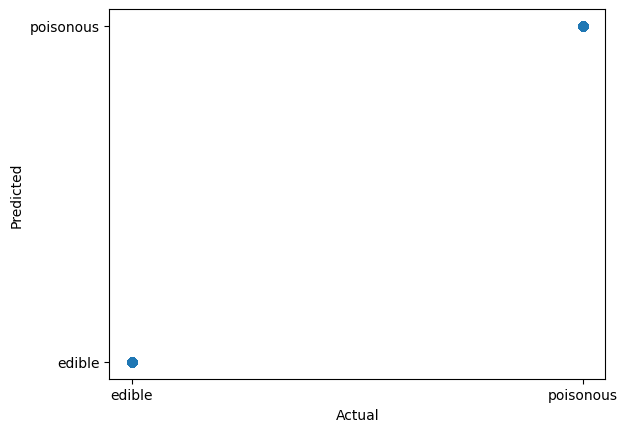

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

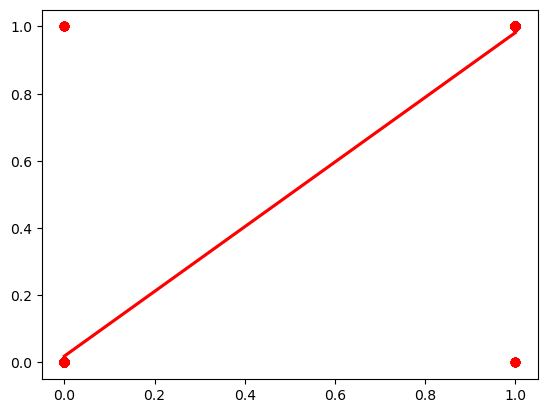

In [575]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');



In [576]:



import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': y_pred_values, 'Difference': y_test_values - y_pred_values})

# Display pred_df
print(pred_df)

print("Shape of y_test:", y_test.shape)


      Actual Value  Predicted Value  Difference
0                0                0           0
1                0                0           0
2                0                0           0
3                1                1           0
4                0                0           0
...            ...              ...         ...
2026             1                1           0
2027             1                1           0
2028             0                0           0
2029             0                0           0
2030             0                0           0

[2031 rows x 3 columns]
Shape of y_test: (2031,)


In [577]:
model_list


['Logistic Regression',
 'Decision Tree',
 'Random Forest',
 'SVM',
 'K-Nearest Neighbors']

In [578]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (2031,)
Shape of y_pred: (2031,)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

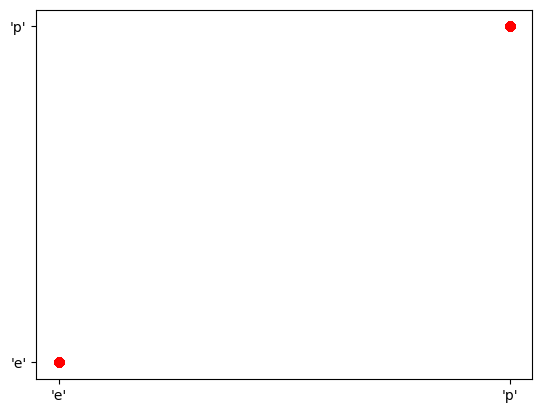